<a href="https://colab.research.google.com/github/riszwinger/tensorflow_cert/blob/main/basic/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os

from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

print('TF Version: {}'.format(tf.version.VERSION))
print('GPU is','avliable' if tf.config.list_physical_devices('GPU') else 'not avaliable')

TF Version: 2.6.0
GPU is avliable


In [2]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [3]:
url='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

data_dir=tf.keras.utils.get_file(fname='cats_and_dogs.zip',origin=url,extract=True)
print(data_dir)

/root/.keras/datasets/cats_and_dogs.zip


In [4]:
!ls /root/.keras/datasets/


cats_and_dogs_filtered	cats_and_dogs.zip


In [5]:
os.path.dirname(data_dir)

'/root/.keras/datasets'

In [6]:
os.path.join(os.path.dirname(data_dir),'cats_and_dogs_filtered')

'/root/.keras/datasets/cats_and_dogs_filtered'

In [7]:
!ls /root/.keras/datasets/cats_and_dogs_filtered

train  validation  vectorize.py


In [8]:
train_dir=os.path.join(os.path.dirname(data_dir),'cats_and_dogs_filtered','train')
valid_dir=os.path.join(os.path.dirname(data_dir),'cats_and_dogs_filtered','validation')

In [9]:
os.listdir(train_dir)[:3]

['dogs', 'cats']

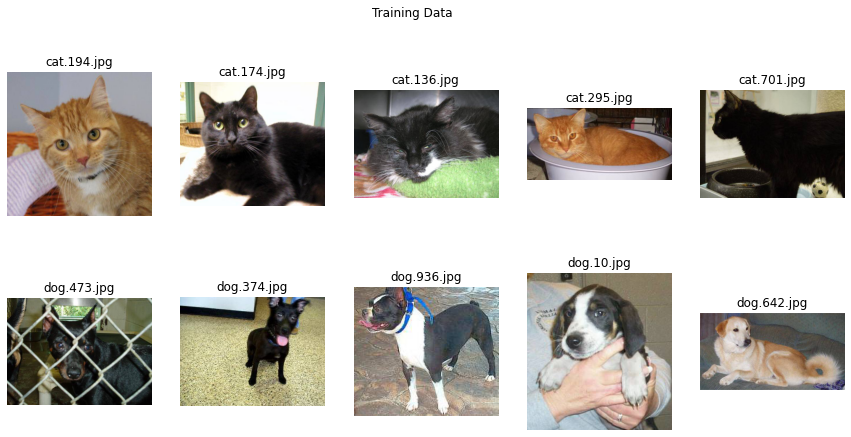

In [10]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def visualize_data(labels, dir, title):
    """
    Uses matplotlib to visualize PIL images
    :param labels (list) :  list of labels eg: ['cats','dogs']
    :param dir: path of files with labels as subfolders
    :param title: title of the plot
    :return: visualize 5 images from each label randomly
    """
    # labels=['horses','humans']
    num_class = len(labels)
    # train_dir="/tmp/horse-or-human/"
    fig, ax = plt.subplots(num_class, 5, figsize=(15, 7))
    for i in range(num_class):
        for j in range(5):
            img_list = (os.listdir(os.path.join(dir, labels[i])))
            img = img_list[random.randint(0, len(img_list))]
            ax[i, j].imshow(mpimg.imread(os.path.join(dir, labels[i], img)))
            ax[i, j].set_title(img)
            ax[i, j].axis('off')
    plt.suptitle(title)
    plt.show()


# Example
labels=['cats','dogs']
dir=train_dir
title='Training Data'
visualize_data(labels,dir,title)

In [11]:
## Read data

In [12]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_dir,image_size=(180,180),seed=123,)
valid_ds=tf.keras.preprocessing.image_dataset_from_directory(valid_dir,image_size=(180,180),seed=123,)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [13]:
train_ds.class_names

['cats', 'dogs']

In [27]:
def get_callbacks(name):
  return [
          tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5),
          tf.keras.callbacks.TensorBoard(logdir/name)
  ]

In [28]:
def compile_and_fit(model,name,epochs=1000):
  
  model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
  model.summary()

  history=model.fit(train_ds,
                    epochs=epochs,
                    validation_data=valid_ds,
                    callbacks=get_callbacks(name))
  return history

## Model-1

In [29]:
model = tf.keras.models.Sequential(name='basic_1')
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='relu'))

In [30]:
size_history={}

In [31]:
size_history['basic']=compile_and_fit(model,'sizes/basic',20)

Model: "basic_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 20, 20, 64)        0   

## Augument

In [16]:
model = tf.keras.models.Sequential(name='basic_1')
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='relu'))